In [14]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/lutzhamel/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

Already up to date.


# Unsupervised Learning: Clustering
Unsupervised learning broadly falls into two categories:

1. Dimension reduction
1. Clustering

Here we focus on clustering of data.
Unsupervised machine learning as clustering is the machine learning task of inferring a function that describes the hidden structure from *unlabeled* data,

> In unlabeled data a concept, classification, or categorization is not included with the observations, that is, there is no target or dependent variable in the dataset under investigation!


# The k-Means Algorithm


Perhaps the most wellknown clustering algorithm is the k-means algorithm.
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled, numeric dataset – the k in the name.
It accomplishes this using a simple concept of what the optimal clustering looks like:

* A *cluster center* is the arithmetic mean of all the points belonging to that cluster – the  mean in the name.
* Each point is closer to its own cluster center than to any other cluster center in the dataset.

Those two assumptions are the basis of the k-means model.

Source: [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

## Visualization of k-Means

Before we take a look at the algorithm itself let's build up some intuition by visualizing the k-means model.  As stated before, the model is simply a set of k points in the same data dimensionality as the training data and the k-means algorithm places those points at the centers of the clusters it found. Here we visualize the k-means model on a synthetic dataset where we now the number of clusters contained in the data.

In [15]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

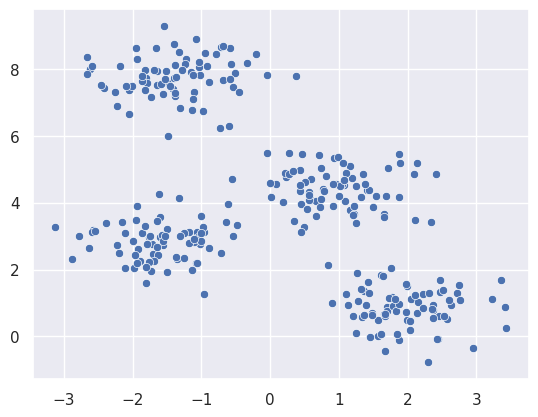

In [16]:
# generate data with 4 clusters.
X = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)[0] # only point coordinates
sns.scatterplot(x=X[:,0], y=X[:,1]);

<Axes: >

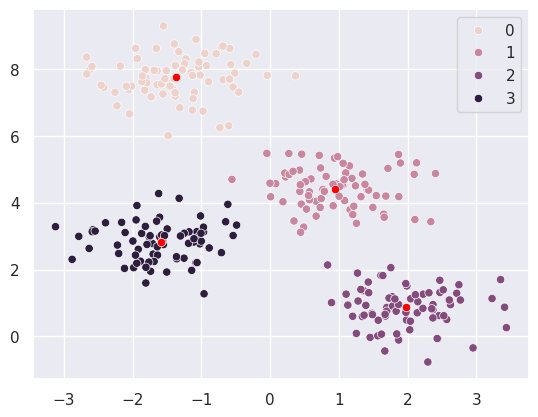

In [17]:
# build a k-means model with k=4
model = KMeans(n_clusters=4, n_init='auto')
model.fit(X)

# plot clusters by color according to cluster model
cluster_label = model.predict(X) # assign each point to a cluster
sns.scatterplot(x=X[:,0], y=X[:,1], hue=cluster_label)

# plot centers
centers = model.cluster_centers_
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='red')


## A More Detailed Look at k-Means

The expectation–maximization approach here consists of the following procedure:

* Guess some cluster centers
* Repeat until converged
    1. E-Step: assign points to the nearest cluster center
    1. M-Step: set the cluster centers to the mean

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to - in this context expectation is just a fancy word of mean/average.

The "M-step" or "Maximization step" is so-named because it involves maximizing the mean of the data in each cluster.

Here is a visualization of the process,

![kmeans-steps](https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/kmeans.gif)



### The "k" in k-Means

One of the big drawbacks of the k-means algorithm is the necessity to "guess" the correct number of clusters to find in the data. Consider the consequences of an incorrect value for k.  

First we consider the case where k is picked too large.  Here we have four actual clusters in the data but we are searching for 6.  Notice that k-means starts to split existing clusters into non-existing sub-clusters.

<Axes: >

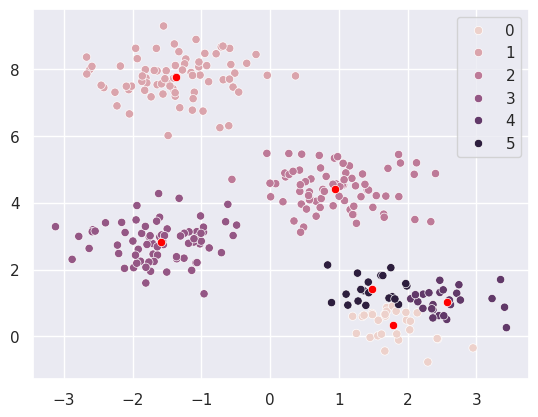

In [18]:
# cluster blobs with non-optimal value for k
model = KMeans(n_clusters=6, n_init='auto')
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels)

# plot centers
centers = model.cluster_centers_
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='red')

Next we consider the case where we select k too small.  Here we select k to be the value 2. Notice how k-means starts to merge existing clusters.

<Axes: >

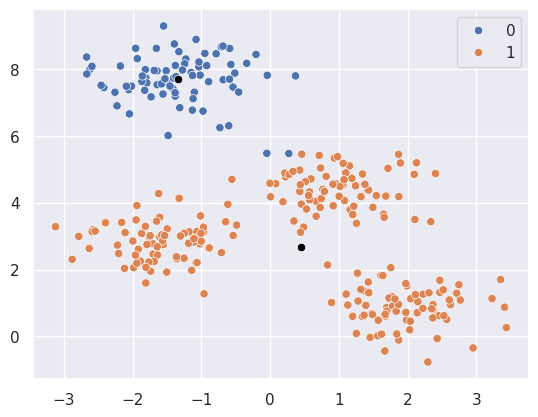

In [19]:
# cluster blobs with non-optimal value for k
model = KMeans(n_clusters=2, n_init='auto')
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels)

# plot centers
centers = model.cluster_centers_
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black')

## The Elbow Method

We will use the elbow method in order to determine the optimal value for k.  The elbow method computes a series cluster models and
computes the variance within the found clusters.  The characteristic crick in the curve  of the elbow is where the variance within the clusters changes drastically.  Increasing k beyond the value at the crick will not improve the model.  In fact, it is likely that it will lead to "phantom" clusters as we saw above when we picked k too large where large, coherent clusters are split due to the fact that k-means has to find exactly k clusters.


This interactive piece of code demonstrates this.  As long as we pick the k from the elbow of the curve we obtain good cluster models.

Number of clusters to generate: 4


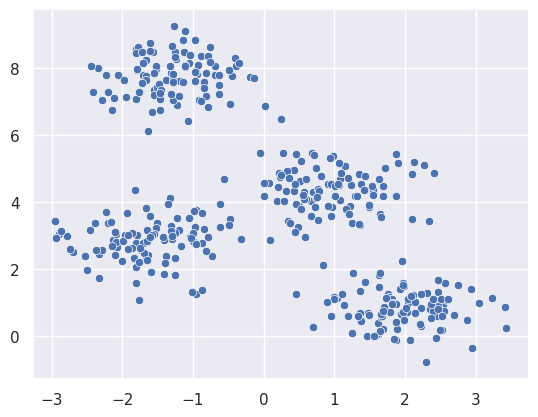

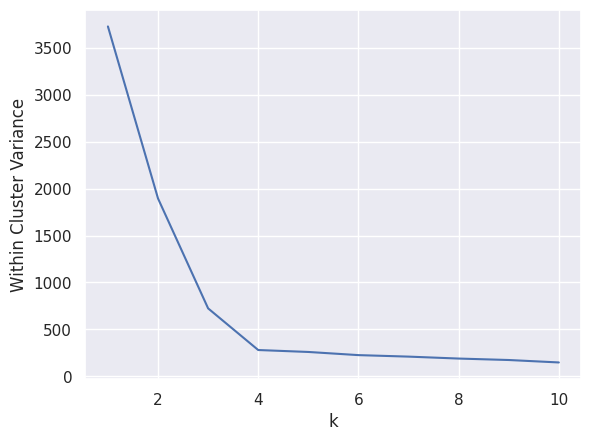

Number of clusters to model: 4


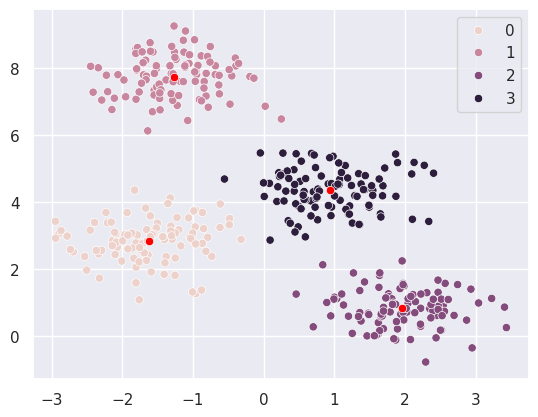

In [20]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import show
from sklearn.datasets import make_blobs
from elbow import plot_elbow

# generate the data
k_data = int(input("Number of clusters to generate: "))
X = make_blobs(n_samples=k_data*100,
                     centers=k_data,
                     cluster_std=0.60,
                     random_state=0)[0]

# plot clusters
sns.scatterplot(x=X[:,0], y=X[:,1])
show()

# generate elbow plot
plot_elbow(X, 10)

# build model for the given k
k_clusters = int(input("Number of clusters to model: "))
model = KMeans(n_clusters=k_clusters, n_init='auto')
model.fit(X)
labels = model.predict(X)

# plot clusters by color according to cluster model
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels)

# plot centers
centers = model.cluster_centers_
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='red')
show()

## k-Means and Non-Convex Clusters

Another drawback of k-means is that it assumes that all clusters are convex (ball-like).  If the cluster structure in the dataset does not conform to that assumption k-means will likely not perform very well.  We demonstrate that with a dataset where the clusters are "moon" shaped.

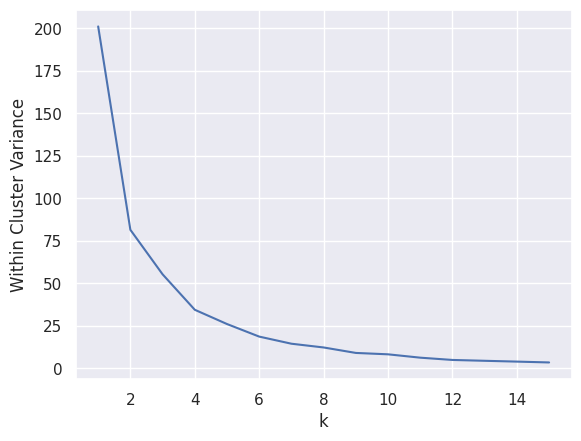

In [21]:
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from elbow import plot_elbow

# generate data
X = make_moons(200, noise=.05)[0]

# generate elbow plot to find optimal k
plot_elbow(X,15)



<Axes: >

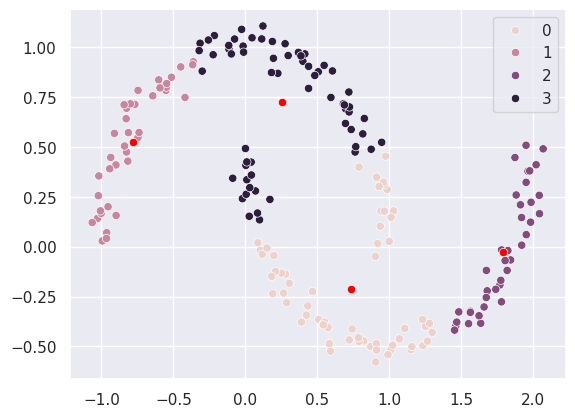

In [22]:
# fit model
k = 4 # from elbow plot
model = KMeans(n_clusters=k, n_init='auto')
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels)

# plot centers
centers = model.cluster_centers_
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='red')


It is clear from the last plot that k-means did not pick up on the underlying cluster structure.

# Clustering with k-Means: An Example

As an example of k-mean we cluster iris flowers using this algorithm.  We know from studying this dataset before that there are three kinds of iris flowers in this dataset each described by the shape of its flower.  The question is, do those flowers exists as well defined clusters and can we recover those clusters using k-means?



In [23]:
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from elbow import plot_elbow

# get data
df = pd.read_csv(home+"iris.csv")
X = df.drop(['id','Species'],axis=1)
y = df['Species']

<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

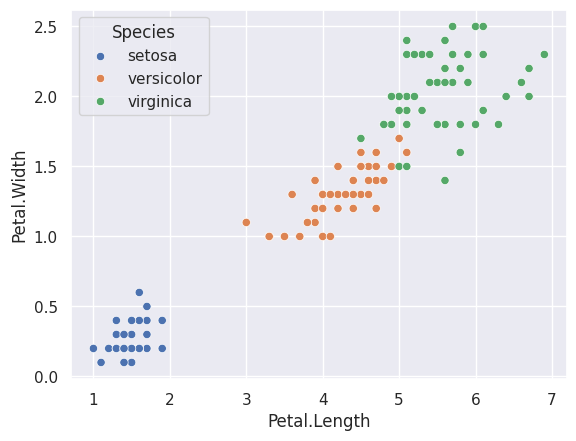

In [24]:
# function that maps a species label into a color
def color_map(x):
  if x == 'setosa':
    return 'yellow'
  elif  x == 'versicolor':
    return 'blue'
  else: # virginica
    return 'green'

# mapping the species label vector into a color vector
#color_labels = pd.Series(y.iloc[:,0]).map(color_map)

# visualize a 2-D view of the dataset just to get a feel for the clusters
sns.scatterplot(data=X, x='Petal.Length', y='Petal.Width', hue=y)


As we have seen before, when we studied this dataset in the context of classification, there are three distinct clusters visible. Let's run the elbow plot to see if it can recover the three clusters.

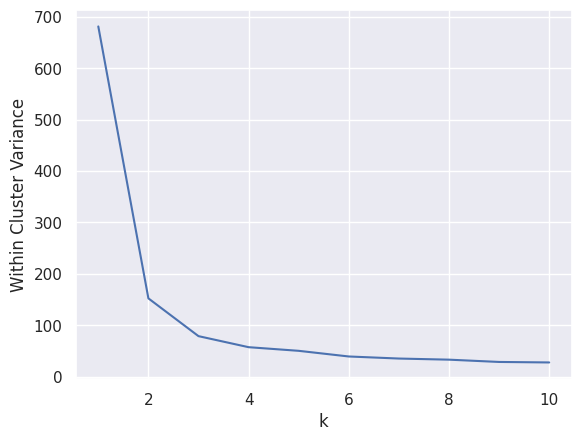

In [25]:
# apply elbow method to find optimal k
plot_elbow(X)


Sure enough, we can see two distinct cricks in the elbow curve: One at k=2 and one at k=3.  This interesting in that the crick at k=2 indicates that the clusters for virginica and versicolor basically form one huge cluster if we don't look too closely. That means that the data contains two clusters and the elbow method picked up on that.  The crick at k=3 is what we expected to see.

Let's build out k-means model with k=3 and plot the model on top of the dataset.  We hope to see that the centroids will wind up in the center of the clusters.

<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

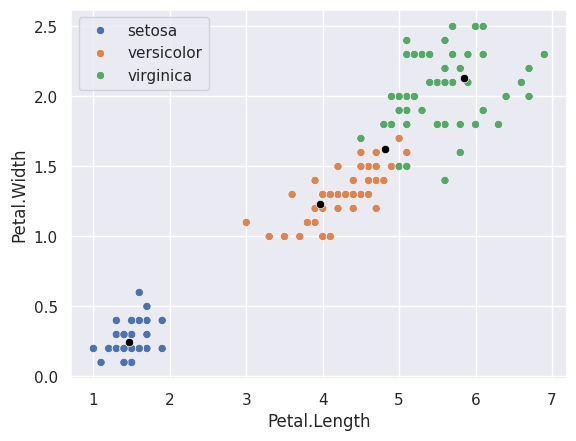

In [27]:
# fit model
k = 4 # from elbow plot
model = KMeans(n_clusters=k, n_init='auto')
model.fit(X)

# plot data by color according to assigned cluster
sns.scatterplot(data=X, x='Petal.Length', y='Petal.Width', hue=y)

# plot centers
centers = pd.DataFrame(model.cluster_centers_, columns=X.columns)
sns.scatterplot(x=centers['Petal.Length'], y=centers['Petal.Width'], color='black')

As expected, the centers of the clusters wind up right in the middle of the data clusters.  Bear in mind that we are looking at a 2-D projection of the dataset and in that projection the centers might not appear to be exactly the arithmetic mean.  However, if we could plot a 4-D dataset then we would find that the centers are exactly at the arithmetic mean of the data clusters.

<!--
# Final Project Proposal

The final project could be a (team) app (e.g. Python script that implements some non-trivial functionality with/without visualization or an app built on your favorite platform) or it can be an individual analysis project.

Details in BrightSpace.
-->
